# Ground-Cover Classification Activity

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from osgeo import gdal

## Data

We're going to be looking at satellite images. Let's have a look at one.

In [78]:
satellite_2004_full = gdal.Open('../img/SPOT/2004.img').ReadAsArray() / 255
satellite_2010_full = gdal.Open('../img/SPOT/2010.img').ReadAsArray() / 255

In [125]:
scale_by = .25
import scipy.misc
def scale_image(img, size):
    return np.array([scipy.misc.imresize(chan, size) for chan in img])
satellite_2004 = scale_image(satellite_2004_full, scale_by)
satellite_2010 = scale_image(satellite_2010_full, scale_by)

In [85]:
def show_image(img, ax=None):
    if len(img.shape) == 3:
        img = np.transpose(img, (1,2,0))
    if ax is None:
        plt.imshow(img)
    else:
        ax.imshow(img)

def show_rgb(red, green, blue, ax=None):
    show_image(np.array([red, green, blue]), ax=ax)

<IPython.core.display.Javascript object>


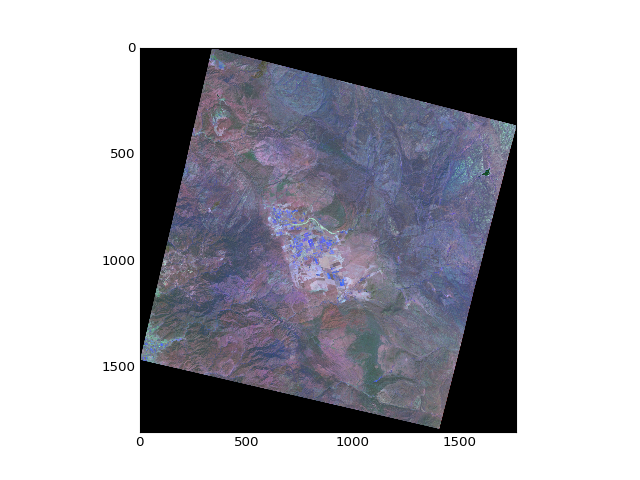

In [87]:
fig, axes = plt.subplots()
green, red, NIR, MIR = satellite_2010
show_rgb(red=MIR, green=NIR, blue=green)
#show_rgb(red=red, green=green, blue=green)

Exercises here TODO:
1. exploring how an image is represented, as pixels
2. trying different ways of mapping the spectral channels

# Define the Problem

We're going to try to identify ground cover.

Input: a satellite image (4 channels: red, green, NIR, MIR)
Output: for each class, an image of how likely the pixel is to be in that class.

What makes a *good* output? We'll use a simple measure for now: how many pixels did we get right? We'll decide that each pixel belongs to the *class with the maximum value*. And we'll count how many times we made the right decision.

In [126]:
classes_2004 = scipy.misc.imresize(gdal.Open("../img/SPOT/2004_12class.img").ReadAsArray(), scale_by)
classes_2010 = scipy.misc.imresize(gdal.Open("../img/SPOT/2010_12class.img").ReadAsArray(), scale_by)


In [50]:
# This is if we we wanted to cluster ourselves:
# import sklearn.cluster
# cluster = sklearn.cluster.MiniBatchKMeans(n_clusters=36)
# np.reshape(satellite_2010, (4, -1)).shape
# clustered_2010 = cluster.fit_predict(np.reshape(satellite_2010, (4, -1)).T).reshape(satellite_2010.shape[1:])


In [92]:
def show_img_and_classes(red, green, blue, classes):
    fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,5))
    show_rgb(red=red, green=green, blue=blue, ax=axs[0])
    axs[1].imshow(classes)

In [128]:
true_classes = np.argmax(np.array([
        classes_2010 == 12,
        classes_2010 != 12]), axis=0)

In [109]:
stream = np.maximum(2*green + 1.1*red + .5*MIR - 200, 0)
other = np.ones_like(stream)
output = np.array([stream, other])

In [110]:
classes = np.argmax(output, axis=0)

<IPython.core.display.Javascript object>


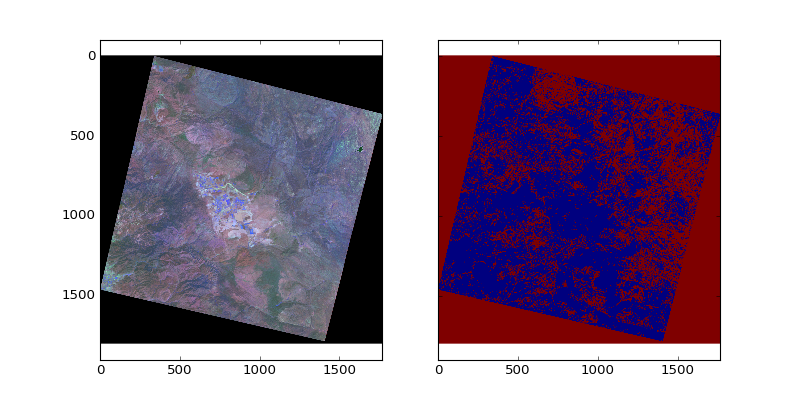

In [114]:
# show_img_and_classes(vis, classes_2010==12)
show_img_and_classes(red=MIR, green=NIR, blue=green, classes=classes)

In [129]:
true_classes.shape

(1801, 1766)

<IPython.core.display.Javascript object>


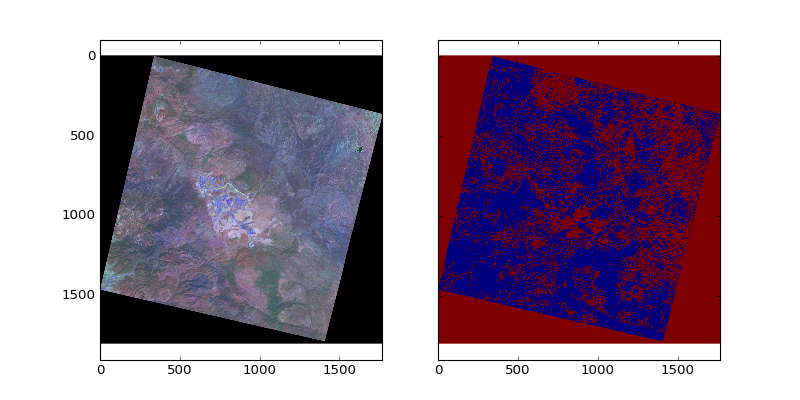

In [130]:
correct_img = classes == true_classes
show_img_and_classes(red=MIR, green=NIR, blue=green, classes=correct_img)